In [1]:
import pandas as pd

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('/Users/rasmusmonsted/Desktop/From A2A/Assignment/fata2025/datasets/WillandAgency/European_data_2000.csv')
# add datapoint with Dune 2 data

# Extract relevant columns
texts = df["plotLong"].astype(str).tolist()  # Convert to string in case of NaNs
ratings = df["imdbRating"].values  # Target variable


In [ ]:
from transformers import DistilBertTokenizer, DistilBertModel
import torch

# Load DistilBERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained(distilbert-base-uncased)
model = DistilBertModel.from_pretrained(distilbert-base-uncased )


/Users/rasmusmonsted/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/rasmusmonsted/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
import numpy as np
from tqdm import tqdm  # Progress bar

def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():  # Disable gradient computation
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()  # Mean pooling

# Convert all plot descriptions into embeddings
X_bert = np.array([get_bert_embedding(text) for text in tqdm(texts)])


100%|██████████| 2000/2000 [02:46<00:00, 11.98it/s]


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_bert, ratings, test_size=0.2, random_state=42)


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Train the model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Predict
y_pred = regressor.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}")


MAE: 0.66, MSE: 0.78


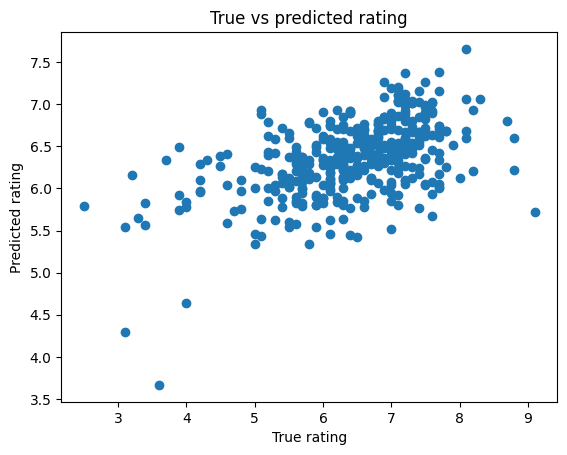

In [9]:
# plot the results
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("True rating")
plt.ylabel("Predicted rating")
plt.title("True vs predicted rating")
plt.show()

In [14]:
# insert custom plot description
plot_description = """Following the destruction of House Atreides by House Harkonnen, Princess Irulan, the daughter of Padishah Emperor Shaddam IV, journals about her father s betrayal of the Atreides. On Arrakis, Stilgar s Fremen troops accompany Paul Atreides and his pregnant Bene Gesserit mother, Lady Jessica, to Sietch Tabr. Some Fremen suspect they are spies, while Stilgar and others see signs of the prophecy that a mother and son from the Outer World will bring prosperity to Arrakis.
The Fremen accept Paul but Stilgar tells Jessica she must succeed Sietch Tabr s dying Reverend Mother by drinking the Water of Life-a drug fatal for males and untrained women. She uses her Bene Gesserit training to transmute the liquid and survive, inheriting the memories of all past Reverend Mothers. The liquid prematurely awakens the mind of her unborn daughter, Alia, allowing Jessica to communicate with her. They agree to focus on convincing the more skeptical northern Fremen of the prophecy. Chani and her friend, Shishakli, correctly believe the prophecy was fabricated to manipulate the Fremen, but Chani begins to respect Paul after he declares that he only intends to fight alongside the Fremen, not to rule them.
Paul and Chani fall in love as Paul immerses himself in Fremen culture: learning their language, becoming a Fedaykin fighter, riding the largest sand-worm ever seen, and raiding Harkonnen spice operations. Paul adopts the Fremen names "Usul" and "Muad Dib". Due to the continuing spice raids, Baron Vladimir Harkonnen replaces his nephew, Rabban, as Arrakis s ruler with his cunning and psychopathic younger nephew, Feyd-Rautha. Lady Margot Fenring, a Bene Gesserit, is sent to evaluate Feyd-Rautha as a prospective Kwisatz Haderach and secure his genetic lineage.
Jessica travels south to unite with Fremen fundamentalists who believe most strongly in the prophecy. Paul remains in the north, fearful that his visions of an apocalyptic holy war will come to pass if he goes south as a messiah. During a raid on a smuggler spice harvester, Paul reunites with Gurney Halleck, who leads Paul to the hidden atomic warhead stockpile of House Atreides. Feyd-Rautha unleashes a devastating attack on the northern Fremen, destroying Sietch Tabr, burning Shishakli alive, and forcing Paul and the survivors to journey south. Upon arrival, Paul drinks the Water of Life and falls into a coma. This angers Chani, but Jessica compels her to mix her tears with the liquid, which awakens Paul. Now possessing a partial clairvoyance across space and time, Paul sees an adult Alia on water-filled Arrakis. He also sees a singular path to victory among all possible futures, and that Jessica is Baron Harkonnen s daughter.
Paul meets with the southern Fremen war council, galvanizing Stilgar and the crowd by demonstrating his ability to discern their deepest thoughts. He declares himself the Lisan al Gaib and sends a challenge to Shaddam, who arrives on Arrakis with Irulan and the Sardaukar. Shaddam chastises the Harkonnens for their failures and cuts the Baron s life support. Meanwhile, the Fremen launch an offensive, using atomics and sand-worms to overpower the Sardaukar. Paul executes the Baron and captures Shaddam and his entourage. Meanwhile, Gurney leads an assault on Arrakeen, intercepting and killing Rabban.
Paul challenges Shaddam for the throne and, to Chani s dismay, demands to marry Irulan. Previously summoned by the Baron, the Great Houses arrive in orbit, ready to invade the planet, but Paul threatens to destroy the spice fields with atomic weapons if they intervene. Feyd-Rautha volunteers to be Shaddam s champion, and Paul kills him in a duel despite being stabbed twice.
Irulan agrees to Paul s request for marriage on the condition that her father lives. Shaddam surrenders, but the Great Houses reject Paul s ascendancy, so he orders the Fremen to attack the orbiting fleet. As Stilgar leads the Fremen onto the captured Sardaukar ships, Jessica and Alia reflect on the beginning of Paul s holy war."""
X_custom = get_bert_embedding(plot_description).reshape(1, -1)
rating_custom = regressor.predict(X_custom)[0]
print(f"Predicted rating for custom plot description: {rating_custom:.2f}")

Predicted rating for custom plot description: 6.12


In [ ]:
# grid search
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

regressor = RandomForestRegressor(random_state=42)
search = RandomizedSearchCV(regressor, param_grid, n_iter=10, cv=5, scoring="neg_mean_absolute_error", random_state=42)
search.fit(X_train, y_train)
print(f"Best hyperparameters: {search.best_params_}")


KeyboardInterrupt: 

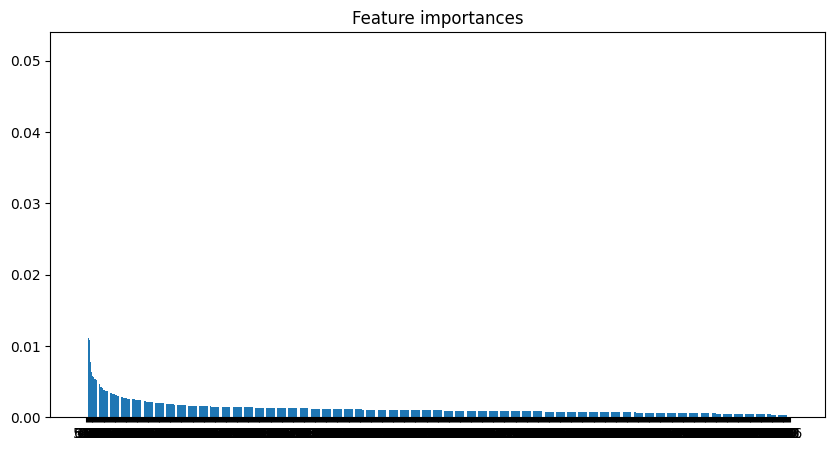

In [16]:
# feature importance
importances = regressor.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), indices)
plt.show()

In [21]:
# try xgboost
from xgboost import XGBRegressor

regressor_xgb = XGBRegressor(random_state=42)
regressor_xgb.fit(X_train, y_train)
y_pred_xgb = regressor_xgb.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"XGBoost: MAE: {mae_xgb:.2f}, MSE: {mse_xgb:.2f}")

XGBoost: MAE: 0.66, MSE: 0.80


In [20]:
# rescale the ratings
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer

scaler = MinMaxScaler()
y_train_rescaled = scaler.fit_transform(y_train.reshape(-1, 1)).ravel()

# Train the model
regressor_rescaled = RandomForestRegressor(n_estimators=100, random_state=42)
regressor_rescaled.fit(X_train, y_train_rescaled)

# Predict
y_pred_rescaled = regressor_rescaled.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred_rescaled.reshape(-1, 1)).ravel()

# Evaluate
mae_rescaled = mean_absolute_error(y_test, y_pred_rescaled)
mse_rescaled = mean_squared_error(y_test, y_pred_rescaled)
print(f"Rescaled: MAE: {mae_rescaled:.2f}, MSE: {mse_rescaled:.2f}")

# Test function transformer
transformer = FunctionTransformer(func=np.log1p, inverse_func=np.expm1)
y_train_transformed = transformer.fit_transform(y_train.reshape(-1, 1)).ravel()

# Train the model
regressor_transformed = RandomForestRegressor(n_estimators=100, random_state=42)
regressor_transformed.fit(X_train, y_train_transformed)

# Predict
y_pred_transformed = regressor_transformed.predict(X_test)
y_pred_transformed = transformer.inverse_transform(y_pred_transformed.reshape(-1, 1)).ravel()

# Evaluate
mae_transformed = mean_absolute_error(y_test, y_pred_transformed)
mse_transformed = mean_squared_error(y_test, y_pred_transformed)
print(f"Transformed: MAE: {mae_transformed:.2f}, MSE: {mse_transformed:.2f}")


Rescaled: MAE: 0.66, MSE: 0.78
Transformed: MAE: 0.67, MSE: 0.79


In [22]:
# ensemble
from sklearn.ensemble import VotingRegressor

regressor_ensemble = VotingRegressor([
    ("rf", regressor),
    ("xgb", regressor_xgb),
    ("rf_rescaled", regressor_rescaled),
    ("rf_transformed", regressor_transformed),
])

regressor_ensemble.fit(X_train, y_train)
y_pred_ensemble = regressor_ensemble.predict(X_test)
mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
print(f"Ensemble: MAE: {mae_ensemble:.2f}, MSE: {mse_ensemble:.2f}")

Ensemble: MAE: 0.64, MSE: 0.75


## Extreme values Predictors

In [23]:
low_threshold = np.percentile(ratings, 25)
high_threshold = np.percentile(ratings, 75)

low_indices = np.where(y_test < low_threshold)
high_indices = np.where(y_test > high_threshold)
medium_indices = np.where((y_test >= low_threshold) & (y_test <= high_threshold))

for subset, name in zip([low_indices, medium_indices, high_indices], ["low", "medium", "high"]):
    y_subset = y_test[subset]
    y_pred_subset = y_pred_ensemble[subset]
    mae_subset = mean_absolute_error(y_subset, y_pred_subset)
    mse_subset = mean_squared_error(y_subset, y_pred_subset)
    print(f"{name.capitalize()}: MAE: {mae_subset:.2f}, MSE: {mse_subset:.2f}")

Low: MAE: 1.04, MSE: 1.60
Medium: MAE: 0.35, MSE: 0.21
High: MAE: 0.92, MSE: 1.15


In [32]:
model_xgm = XGBRegressor(random_state=42, objective="reg:quantileerror", quantile_alpha=0.75)
model_xgm.fit(X_train, y_train)
y_pred_xgm = model_xgm.predict(X_test)
mae_xgm = mean_absolute_error(y_test, y_pred_xgm)
mse_xgm = mean_squared_error(y_test, y_pred_xgm)
print(f"XGBoost quantile regression: MAE: {mae_xgm:.2f}, MSE: {mse_xgm:.2f}")

XGBoost quantile regression: MAE: 0.73, MSE: 0.97
